In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as pypatch
from mpl_toolkits import mplot3d
import time
%matplotlib inline

cos, sin = np.cos, np.sin
twopi = np.pi*2.0

In [2]:
def plotLine(x1,y1,x2,y2,c='b',ax=None):
    if ax: # given axis handle
        ax.plot([x1, x2], [y1, y2], color=c, linestyle='-', linewidth=0.2);
    else:
        plt.gca().plot([x1, x2], [y1, y2], color=c, linestyle='-', linewidth=0.2);

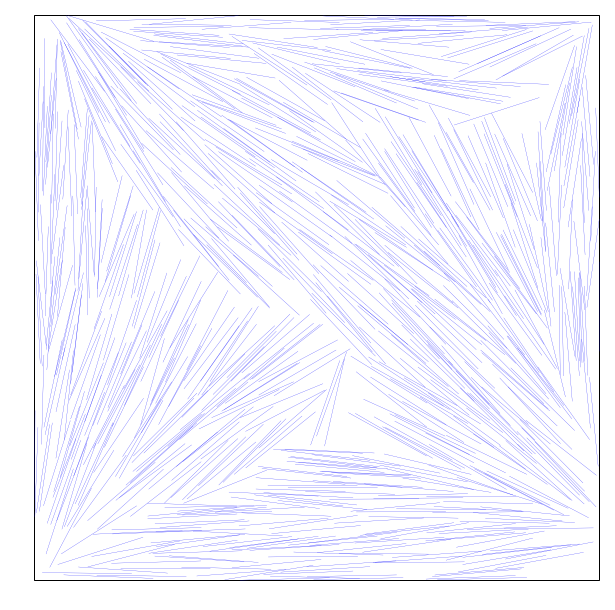

In [9]:
# To view a single unprocessed snap
f = plt.figure();
plt.xticks([]);
plt.yticks([]);
plt.gcf().set_size_inches(8,8);

imgnames = ["T"]
holerad = 0.0
source_dir = "/home/michael/msc/mcmd/runs/"
imgdir = "/home/michael/msc/mcmd/"
bSave = 0

iSnap = 2
fRot = 0
halfL = 1.0/2

X,Y,Th = [],[],[]

for imgname in imgnames:
    f.clf();

    # Count num blocks
    Nblock = 0
    dfile = open(source_dir+imgname, "r")
    for line in dfile.readlines():
        if line == "\n": Nblock+=1
    dfile.seek(0)
    if iSnap == -1: iSnap = Nblock-1


    if not (dfile.readline()[0].isalpha()): dfile.seek(0)
    cntSnap = 0
    for line in dfile.readlines():
        if cntSnap == iSnap:
            if line == "\n" or line.startswith("label"): break
            l = [float(x) for x in line.split()]
            x,y,th = l[2],l[3],l[4]
            # Note th=0 is along the y-axis
            x1 = x - halfL*sin(th)
            y1 = y + halfL*cos(th)
            x2 = x + halfL*sin(th)
            y2 = y - halfL*cos(th)

            # Rotations
            th_ = fRot*np.pi*0.5
            x_ = cos(th_)*x - sin(th_)*y
            y_ = sin(th_)*x + cos(th_)*y
            x1_ = cos(th_)*x1 - sin(th_)*y1
            y1_ = sin(th_)*x1 + cos(th_)*y1
            x2_ = cos(th_)*x2 - sin(th_)*y2
            y2_ = sin(th_)*x2 + cos(th_)*y2                

            plotLine(x1_,y1_,x2_,y2_);

            # For saving data
            X.append(x)
            Y.append(y)
            Th.append(th)
            
        else: 
            if line == "\n": cntSnap+=1
    # For circles
    dfile.seek(0)
    ln = dfile.readline().split("|")
    edge = 0.
    for s in ln:
        if "boxEdge" in s:
            edge = float(s.split()[1])
    radius = edge/2.
    boundary = plt.Rectangle((-radius,-radius),edge,edge,color='k',fill=False);
#     boundary = plt.Circle((0, 0), radius, color='k', fill=False);
    innercirc = plt.Circle((0, 0), holerad, color='k', fill=False);
    dfile.close()
    plt.gca().add_artist(boundary);
    plt.gca().add_artist(innercirc);
#     plt.gca().axis('off');
    
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0.1, wspace = 0.1)
    plt.margins(0.01,0.01)
#     plt.gca().xaxis.set_major_locator(plt.NullLocator())
#     plt.gca().yaxis.set_major_locator(plt.NullLocator())
    if bSave:
        f.savefig(imgdir+imgname+"_"+str(iSnap)+".eps")
#         f.savefig(imgdir+imgname+"_"+str(iSnap)+".eps",pad_inches=0,bbox_inches='tight')

In [8]:
def orders(data):
    S, T, L = 0.,0.,0.
    N = len(data)
    for d in data:
        S += np.cos(2.*(d[2]))
        T += np.sin(2.*(d[2]))
    S/=N
    T/=N
    L = np.sqrt(S*S + T*T)
    return L, S, T

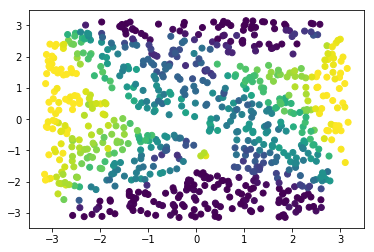

In [25]:
plt.scatter(x,y,c=z,cmap="viridis")

In [11]:
# data = np.asarray((X,Y,Th))
X,Y,Th = np.asarray(X), np.asarray(Y), np.asarray(Th)

Th_ = cos(2*Th)

Text(0.5,0,'y')

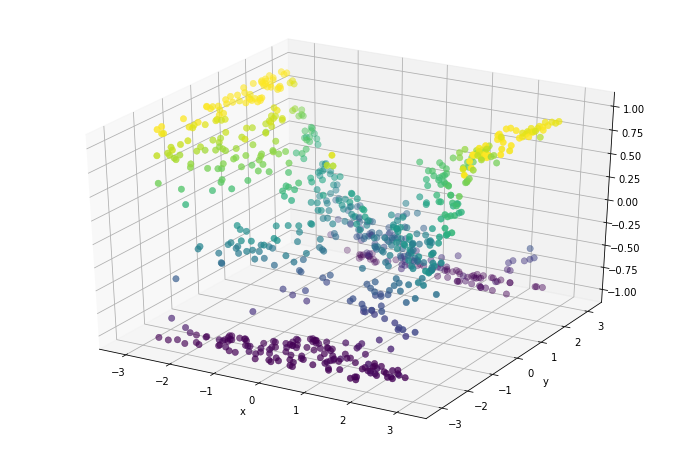

In [32]:
x,y,z = X,Y,Th_

fig, ax = plt.subplots(1,1,figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter(x,y,z, c=z, cmap='viridis', linewidth=0.5, s=40);
# ax.scatter(x,y,c=z, cmap='viridis',linewidth=0.5,s=40);
# ax.plot_trisurf(x,y,z, cmap='viridis', edgecolor=None);
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel(r'$\theta$',rotation='vertical')